# HW-4 (answer key: EDA for Titanic data set + Logistic regression)


[Titanic competition from Kaggle](https://www.kaggle.com/c/titanic).

Instructor: [Pedram Jahangiry](https://github.com/PJalgotrader) 

In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression

sns.set()  

### Data Preprocessing

In [111]:
df = pd.read_csv('titanic_train.csv')
df_test = pd.read_csv('titanic_test.csv')

In [112]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [114]:
categorical= ['Pclass','Sex','Embarked']

for i in categorical:
    df[i]=df[i].astype("category")
    df_test[i]=df_test[i].astype("category")
    
df.info()    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null category
Name           891 non-null object
Sex            891 non-null category
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null category
dtypes: category(3), float64(2), int64(4), object(3)
memory usage: 65.6+ KB


In [115]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
PassengerId,891,NaN,NaN,NaN,446,257.354,1,223.5,446,668.5,891
Survived,891,NaN,NaN,NaN,0.383838,0.486592,0,0,0,1,1
Pclass,891,3,3,491,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Name,891,891,"Petroff, Mr. Nedelio",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,891,2,male,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,714,NaN,NaN,NaN,29.6991,14.5265,0.42,20.125,28,38,80
SibSp,891,NaN,NaN,NaN,0.523008,1.10274,0,0,0,1,8
Parch,891,NaN,NaN,NaN,0.381594,0.806057,0,0,0,0,6
Ticket,891,681,1601,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fare,891,NaN,NaN,NaN,32.2042,49.6934,0,7.9104,14.4542,31,512.329


# Question 1 : Exploratory Data Analysis
For all of our Classification ML models, we are going to work with Titanic data set.  I need you to do a complete EDA on this data set. Once you are done with cleaning and restructuring the variables, you can save it as a new csv file and use if for your future classification exercises. 


We'll start by checking out missing data!
## Missing Data

We can use seaborn to create a simple heatmap to see where we are missing data!

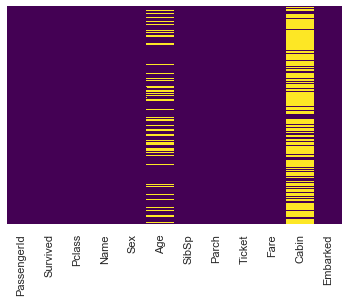

In [116]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis') # no y lables, no color bars
plt.show()

In [117]:
df.isnull().sum()/len(df)

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

Roughly 20 percent of the Age data is missing. The proportion of Age missing is likely small enough for reasonable replacement with some form of imputation. Looking at the Cabin column, it looks like we are just missing too much of that data to do something useful with at a basic level. We'll probably drop this later, or change it to another feature like "Cabin Known: 1 or 0". We will drop the rows where Embarked is missing. 

Let's continue on by visualizing some more of the data!

___
## Data Cleaning
We want to fill in missing age data instead of just dropping the missing age data rows. One way to do this is by filling in the mean age of all the passengers (imputation).
However we can be smarter about this and check the median age (in case the distributions are not normal!) by passenger class. For example:


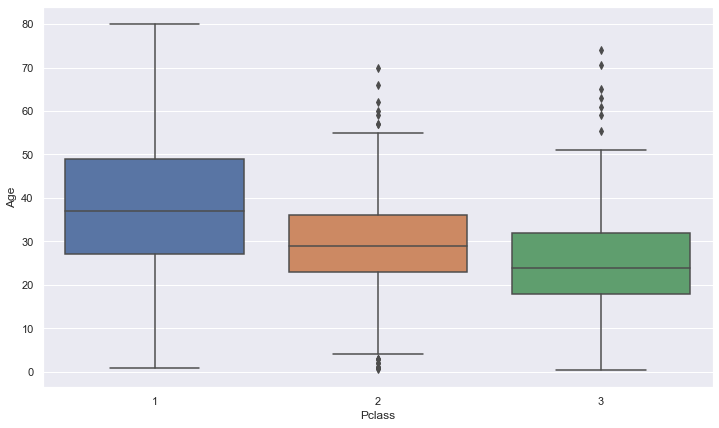

In [118]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=df)
plt.show()

We can see the wealthier passengers in the higher classes tend to be older, which makes sense. We'll use these average age values to impute based on Pclass for Age.

In [119]:
df[['Pclass','Age']].groupby("Pclass").median()

,Age
Pclass,
1,37.0
2,29.0
3,24.0


In [120]:
df_test[['Pclass','Age']].groupby("Pclass").median()

,Age
Pclass,
1,42.0
2,26.5
3,24.0


Let's construct the functions that fill the missing ages for us. We have to do it for both the train set and the test set. 

In [121]:
def fill_age_train (data):
    Age = data['Age']
    Pclass = data['Pclass']
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24

    else:
        return Age

In [122]:
def fill_age_test (data):
    Age=data['Age']
    Pclass=data['Pclass']
    
    if pd.isnull(Age):
        
        if Pclass==1:
            return 42
        elif Pclass ==2:
            return 26.5
        else: 
            return 24
        
    else:
        return Age

Now apply the functions!

In [123]:
df['Age'] = df.apply(fill_age_train,axis=1)
df_test['Age'] = df_test.apply(fill_age_test,axis=1)

Great! Let's go ahead and make a new colum named Cabin_known and then drop the Cabin column.

In [124]:
df['Cabin_known']=df['Cabin'].apply(lambda x:0 if pd.isna(x)==True else 1)
df_test['Cabin_known']=df_test['Cabin'].apply(lambda x:0 if pd.isna(x)==True else 1)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_known
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [125]:
df.drop('Cabin',axis=1,inplace=True)
df_test.drop('Cabin', axis=1, inplace=True)

Now let's drop the 'Name' and 'Ticket' columns and the rows in Embarked that are missing.

In [126]:
df.drop(['Name','Ticket'],axis=1,inplace=True)
df_test.drop(['Name','Ticket'],axis=1,inplace=True)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_known
0,1,0,3,male,22.0,1,0,7.2500,S,0
1,2,1,1,female,38.0,1,0,71.2833,C,1
2,3,1,3,female,26.0,0,0,7.9250,S,0
3,4,1,1,female,35.0,1,0,53.1000,S,1
4,5,0,3,male,35.0,0,0,8.0500,S,0


In [127]:
df.dropna(inplace=True)
# note that in application we should drop all the remaining NA values from the test set as well: df_test.dropna(inplace=True)
# but here in Kaggle competition we won't do that because the number of test observations are fixed! 

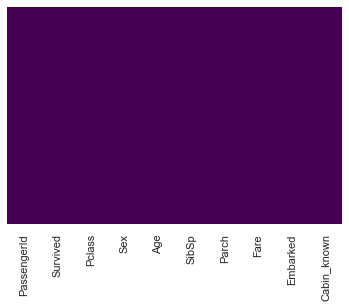

In [128]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

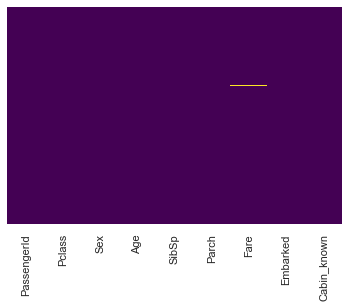

In [129]:
sns.heatmap(df_test.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

It seems that there are missing variables in the 'Fare' variable of the test set. Let's find them!

In [131]:
np.where(np.isnan(df_test['Fare']))

(array([152], dtype=int64),)

Because there is only one missing fare value, we can replace it with 0

In [132]:
df_test['Fare']=df_test['Fare'].fillna(0)

In [133]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
PassengerId    418 non-null int64
Pclass         418 non-null category
Sex            418 non-null category
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Fare           418 non-null float64
Embarked       418 non-null category
Cabin_known    418 non-null int64
dtypes: category(3), float64(2), int64(4)
memory usage: 21.2 KB


In [134]:
df = pd.get_dummies(df, drop_first=True)
df_test = pd.get_dummies(df_test, drop_first=True)
df.head()

,PassengerId,Survived,Age,SibSp,Parch,Fare,Cabin_known,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,1,0,22.0,1,0,7.2500,0,0,1,1,0,1
1,2,1,38.0,1,0,71.2833,1,0,0,0,0,0
2,3,1,26.0,0,0,7.9250,0,0,1,0,0,1
3,4,1,35.0,1,0,53.1000,1,0,0,0,0,1
4,5,0,35.0,0,0,8.0500,0,0,1,1,0,1


Great! Our data is ready for our model! Let's save if for our future use. 

In [135]:
df.to_csv('titanic_train_clean.csv', index=False)
df_test.to_csv('titanic_test_clean.csv', index=False)

# Question 2: Logistic regression

1- Use Logistic regression model from Sklearn package and report the accuracy_test  of your model. Note that because the original target variables in the test set are unobservable, you need to estimate this accuracy_test by applying cross validation to the train set (try K=5 and K=10). 

2- Submit your first csv file to Titanic kaggle competition and report your rank


In [136]:
# Defining the target and feature space for both train and test set. Note that the target for the test set is unknown.

X_train= df.drop(['PassengerId','Survived'], axis=1)
y_train= df['Survived']

X_test= df_test.drop('PassengerId',axis=1)

In [137]:
X_train.head()

,Age,SibSp,Parch,Fare,Cabin_known,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,22.0,1,0,7.2500,0,0,1,1,0,1
1,38.0,1,0,71.2833,1,0,0,0,0,0
2,26.0,0,0,7.9250,0,0,1,0,0,1
3,35.0,1,0,53.1000,1,0,0,0,0,1
4,35.0,0,0,8.0500,0,0,1,1,0,1


In [138]:
y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

## Train the model

In [139]:
logistic = LogisticRegression(solver='lbfgs',max_iter=1000)
logistic.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [155]:
y_hat = logistic.predict(X_test)

## Evaluation

We cannot evaluate the model directly because the test sample is unsupervised. We don't have actual y in the test set. However, we can use the Cross validation with the train set to estimate the accuracy of the test set. 

In [156]:
# defining our own confusion matrix function
from sklearn.metrics import confusion_matrix
def my_confusion_matrix(y, y_hat):
    cm = confusion_matrix(y, y_hat)
    TN, FP, FN, TP = cm[0,0], cm[0,1], cm[1,0], cm[1,1]
    accuracy = round((TP+TN) / (TP+ FP+ FN+ TN) ,2)
    precision = round( TP / (TP+FP),2)
    recall = round( TP / (TP+FN),2)
    cm_labled = pd.DataFrame(cm, index=['Actual : 0 ','Actual : 1'], columns=['Predict : 0','Predict :1 '])
    print('\n')
    print('Accuracy = {}'.format(accuracy))
    print('Precision = {}'.format(precision))
    print('Recall = {}'.format(recall))
    print("-----------------------------------------")
    return cm_labled
 

We can report the confusion matrix for the training set! However, this is not the question of interest. 

In [158]:
my_confusion_matrix(y_train,logistic.predict(X_train) )



Accuracy = 0.82
Precision = 0.79
Recall = 0.71
-----------------------------------------


,Predict : 0,Predict :1
Actual : 0,484,65
Actual : 1,98,242


###  Cross validation

Now let's try to get an estimate for the accuracy of our model in the test set by applying cross validation technique to the training set.

In [159]:
from sklearn.model_selection import cross_val_score

In [165]:
Accuracy_CV=[]
K = (5,10)
for i in K:
    accuracy = cross_val_score(estimator = logistic, X = X_train, y = y_train, cv = i , scoring="accuracy" )
    Accuracy_CV.append(round(accuracy.mean(),3))

Accuracy_CV_df = pd.DataFrame(K, columns=['K'])
Accuracy_CV_df['Accuracy_CV']= Accuracy_CV

Accuracy_CV_df

,K,Accuracy_CV
0,5,0.808
1,10,0.809


So the estimated version of **accuracy_test** of the model is **0.808** using **5-fold** and **0.809** using **10-fold** cross validation. Note that these numbers are smaller than the **accuracy_train** which is **0.82**. 

### Kaggle csv submission

In [170]:
predictions = pd.DataFrame(y_hat, columns=["Survived"])
predictions.head()

,Survived
0,0
1,0
2,0
3,0
4,1


In [172]:
Kaggle_submission= pd.concat([df_test['PassengerId'],predictions], axis=1)

In [173]:
Kaggle_submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [174]:
Kaggle_submission.to_csv("Titanic_logistic_regression.csv", index=False)

### My score in Kaggle competition was 0.77033 and my rank was 10,410

Not bad as our first try :)